# RNGD에서 번역 LLM 실행하기 

- 환경 탐지 (GPU, NPU-FuriosaAI RNGD)

- 번역, 모니터링 실행

In [1]:
from time import time
from translate.one_trans import initialize_translation_environment, translate_text
from common.load_config import load_all_configurations
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/elicer/Jun/llm-rag-chatbot/main/config.yaml"
all_configs = load_all_configurations(config_path)

# Print the loaded configurations
print("Configurations Loaded Successfully:")
print("Active Metrics:", all_configs["active_metrics"])
print("Device Config:", all_configs["device_config"])
print("Model Config:", all_configs["model_config"])
print("Evaluation Settings:", all_configs["evaluation_settings"])

    PyTorch 2.5.1+cu121 with CUDA 1201 (you have 2.1.0+cu121)
    Python  3.10.15 (you have 3.10.15)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Configurations Loaded Successfully:
Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps']
Device Config: {'type': 'GPU', 'model': 'A100', 'count': 1}
Model Config: {'name': 'llama3.1-8B-Instruct', 'quantization': 'W8A8'}
Evaluation Settings: {'task': 'translation', 'output_dir': './results/translation'}


In [3]:

# Test data
test_input = "최신 AI 기술을 활용하여 고객의 요구를 더 효과적으로 예측하고, 개인화된 서비스를 제공할 수 있는 플랫폼을 개발 중입니다."
test_lang = "Korean"
ref_text = "最新のAI技術を活用して顧客のニーズをより効果的に予測し、個別化されたサービスを提供できるプラットフォームを開発中です"
target_lang = "Japanese"

# test_input = "最新のAI技術を活用して顧客のニーズをより効果的に予測し、個別化されたサービスを提供できるプラットフォームを開発中です"
# test_lang = "Japanese"
# ref_text = "최신 AI 기술을 활용하여 고객의 요구를 더 효과적으로 예측하고, 개인화된 서비스를 제공할 수 있는 플랫폼을 개발 중입니다."
# target_lang = "Korean"
# test_input = "이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증."
# ref_text = "The value of the NPU is demonstrated not only through its theoretical performance but also by metrics that are applicable in real-world service environments."

# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)
    
    
# Translation
try:
    start_time = time()
    translated_text = translate_text(test_input, source_language=test_lang, target_language=target_lang)
    elapsed_time = time() - start_time
    print(f"Original: {test_input}")
    print(f"Translated text: {translated_text}")
except RuntimeError as e:
    print(f"Translation failed: {e}")
    translated_text = None
    elapsed_time = 0.0

INFO:2025-01-01 22:08:39 Translation environment detected: Furiosa NPU. Using NPU for translations.


Original: 최신 AI 기술을 활용하여 고객의 요구를 더 효과적으로 예측하고, 개인화된 서비스를 제공할 수 있는 플랫폼을 개발 중입니다.
Translated text: 最新的AI技術を利用し、�客の需求予測を更適切히実行し、个別 hóaされたサービスの提供を可能�とするプラットフォ是一个中004ます。


## Evaluation 

- load_config에서 지정한 것들 고려

In [4]:
# Evaluation
metrics = evaluate_translation(translated_text, ref_text, target_lang, 
                               elapsed_time, all_configs["active_metrics"])
print("Metrics:", metrics)

/home/elicer/anaconda3/envs/jun-rngd/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Error calculating BERTScore: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx
Metrics: {'BLEU': 0.1059, 'METEOR': 0.4145, 'tps': 13.760462211243002, 'BERTScore': 0.0}


In [ ]:
from time import time
from translate.one_trans import initialize_translation_environment, translate_text
from metrics.load_config import load_active_metrics
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/elicer/Jun/llm-rag-chatbot/main/config_npu_translation.yaml"
active_metrics = load_active_metrics(config_path)
print("Active Metrics:", active_metrics)




In [11]:
# Import the function from gpu.py
import sys
sys.path.append('./translate')  # Add the module path to the system path
from gpu import translate_with_gpu

In [13]:
from translate import *

In [14]:
# Test input
test_input = "안녕하세요, 우주는 얼마나 넓나요?"

# Call the translate_text function
out_text = translate_text(test_input)
out_text

'Hello, how vast is the universe?'

In [ ]:
# translate/common.py
from environment import detect_environment
from translate.gpu import translate_with_gpu
from translate.furiosa import translate_with_furiosa

def translate_text(input_text, source_language="ko", target_language="en"):
    """
    Translates text based on the detected environment.

    Args:
        input_text (str): Text to be translated.
        source_language (str): Source language (default: "ko").
        target_language (str): Target language (default: "en").

    Returns:
        str: Translated text.
    """
    environment = detect_environment()

    if environment == "gpu":
        return translate_with_gpu(input_text, source_language, target_language)
    elif environment == "furiosa":
        return translate_with_furiosa(input_text, source_language, target_language)
    else:
        raise EnvironmentError(
            "No suitable environment detected. Please ensure GPU or Furiosa RNGD is available."
        )

In [23]:
r = calculate_bleu_meteor(reference_text, candidate_text)
print(r)

{'BLEU': 0.0103, 'METEOR': 0.1594}


In [2]:
# quality_metrics.py에서 필요한 함수 임포트
from metrics.quality_metrics import calculate_bleu_meteor_score, calculate_bert_score

# 예제 텍스트 설정
reference_text = "Increasingly supermarkets are getting a more varied section of ready-made food. Some even provide a microwave oven or other means to heat food."
candidate_text = "At the supermarket, the variety of ready-to-eat foods has increased. The store has also begun to offer services such as using electronic money."

# BLEU 점수 계산
bleu_score, meteor_score, num_tokens = calculate_bleu_meteor_score(reference_text, candidate_text)
print(f"BLEU Score: {bleu_score}")
print(f"METEOR Score: {meteor_score}")

# BERTScore 계산
try:
    bert_score = calculate_bert_score(reference_text, candidate_text, tgt_lang="English", device="cuda")
    print(f"BERTScore (F1): {bert_score}")
except Exception as e:
    print(f"Error calculating BERTScore: {e}")

BLEU Score: 0.0103
METEOR Score: 0.1594


/home/dudaji/miniconda3/envs/langserve/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


BERTScore (F1): 0.7193


In [25]:
from translate.one_trans import initialize_translation_environment, translate_text
import time
from metrics.quality_metrics import calculate_bleu_meteor_score, calculate_bert_score


# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)

# Perform translation
test_input = "안녕하세요, 번역 테스트입니다."
ref_text = "Hi, this is a test for translation"

In [26]:
start_time = time.time()
result = translate_text(test_input)
time_translate = time.time() - start_time

print("Translated Text:", result)


Translated Text: Hello, this is a translation test.


In [32]:
from metrics.quality_metrics import tokenize
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# 텍스트를 토큰화
reference_tokens = tokenize(ref_text, "English")
candidate_tokens = tokenize(result, "English")
smoothing_function = SmoothingFunction().method1


In [38]:
candidate_tokens

['Hello', ',', 'this', 'is', 'a', 'translation', 'test', '.']

In [49]:
from nltk.translate.meteor_score import meteor_score
reference_str = " ".join(reference_tokens)  # 리스트 -> 문자열 변환
candidate_str = " ".join(candidate_tokens)  # 리스트 -> 문자열 변환
# meteor = meteor_score([reference_str], candidate_str)
meteor = meteor_score([reference_tokens], candidate_tokens)
meteor


0.840561224489796

In [ ]:
num_tokens = len(candidate_tokens)

# 지표 계산
bleu = sentence_bleu([reference_tokens], candidate_tokens, smoothing_function=smoothing_function)
meteor = meteor_score([reference_tokens], candidate_tokens)

In [ ]:
from translate.one_trans import initialize_translation_environment, translate_text
initialize_translation_environment()

In [29]:
bleu_score, meteor_score = calculate_bleu_meteor_score(ref_text, result)
bleu_score, meteor_score

(0.3826, 0.8406)

In [2]:
import nltk

nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional: WordNet을 다른 언어와 함께 사용하려면 필요

[nltk_data] Downloading package wordnet to /home/elicer/nltk_data...
[nltk_data] Downloading package omw-1.4 to /home/elicer/nltk_data...


True

In [3]:
from translate.one_trans import initialize_translation_environment, translate_text
import time
from metrics.quality_metrics import calculate_bleu_meteor_score, calculate_bert_score


# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)

# Perform translation
test_input = "이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증."
ref_text = "The value of the NPU is demonstrated not only through its theoretical performance but also by metrics that are applicable in real-world service environments."
try:
    start_time = time.time()
    result = translate_text(test_input)
    time_translate = time.time() - start_time
    
    bleu_val, meteor_val, num_tokens = calculate_bleu_meteor_score(ref_text, result)
    
    print("Translated Text:", result)
    print(f"BLEU Score: {bleu_val}")
    print(f"METEOR Score: {meteor_val}")
    print("TPS:", num_tokens/time_translate)
except RuntimeError as e:
    print(f"Translation failed: {e}")

INFO:2024-12-31 07:46:47 Translation environment detected: Furiosa NPU. Using NPU for translations.


Translated Text: We are not only verifying the theoretical capabilities of NPU, but also proving its value based on performance metrics that are actually applicable in a service environment.
BLEU Score: 0.066
METEOR Score: 0.5515
TPS: 13.178001252097497


In [4]:
ref_text = "Demonstrate the value of NPU not just theoretically but based on actual metrics applicable in a service environment."
bleu_val, meteor_val, num_tokens = calculate_bleu_meteor_score(ref_text, result)
print("Translated Text:", result)
print(f"BLEU Score: {bleu_val}")
print(f"METEOR Score: {meteor_val}")
print("TPS:", num_tokens/time_translate)

Translated Text: We are not only verifying the theoretical capabilities of NPU, but also proving its value based on performance metrics that are actually applicable in a service environment.
BLEU Score: 0.1744
METEOR Score: 0.6761
TPS: 13.178001252097497


In [1]:
from time import time
from translate.one_trans import initialize_translation_environment, translate_text
from metrics.load_config import load_active_metrics
from metrics.evaluation_transition import evaluate_translation

# Example usage
config_path = "/home/elicer/Jun/llm-rag-chatbot/main/config_npu.yaml"
active_metrics = load_active_metrics(config_path)
print("Active Metrics:", active_metrics)

# Test data
test_input = "이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증."
ref_text = "The value of the NPU is demonstrated not only through its theoretical performance but also by metrics that are applicable in real-world service environments."

# Initialize the translation environment
try:
    initialize_translation_environment()
except EnvironmentError as e:
    print(f"Failed to initialize translation environment: {e}")
    exit(1)
    
    
# Translation
try:
    start_time = time()
    translated_text = translate_text(test_input)
    elapsed_time = time() - start_time
    print(f"Original: {test_input}")
    print(f"Translated text: {translated_text}")
except RuntimeError as e:
    print(f"Translation failed: {e}")
    translated_text = None
    elapsed_time = 0.0

# Evaluation
if translated_text:
    metrics = evaluate_translation(translated_text, ref_text, elapsed_time, active_metrics)
    print("Metrics:", metrics)

    PyTorch 2.5.1+cu121 with CUDA 1201 (you have 2.1.0+cu121)
    Python  3.10.15 (you have 3.10.15)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Active Metrics: ['BLEU', 'METEOR', 'BERTScore', 'tps', 'power_consumption']


INFO:2025-01-01 06:17:39 Translation environment detected: Furiosa NPU. Using NPU for translations.
INFO:2025-01-01 06:17:40 Prefill buckets: [Bucket(batch_size=1, attention_size=512), Bucket(batch_size=1, attention_size=1024)]
INFO:2025-01-01 06:17:40 Decode buckets: [Bucket(batch_size=64, attention_size=2048), Bucket(batch_size=128, attention_size=2048)]
INFO:2025-01-01 06:17:40 For some LLaMA V1 models, initializing the fast tokenizer may take a long time. To reduce the initialization time, consider using 'hf-internal-testing/llama-tokenizer' instead of the original tokenizer.
/home/elicer/anaconda3/envs/jun-rngd/lib/python3.10/site-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Original: 이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증.
Translated text: We are not only seeing theoretical performance, but also proving the value of NPU with practical metrics that can be applied in a real service environment.
Error calculating BERTScore: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx
Metrics: {'BLEU': 0.0353, 'METEOR': 0.4731, 'BERTScore': 0.0}


In [1]:
from metrics.performance_metrics import calculate_power_consumption

# Test for GPU
gpu_device = "cuda:1"
gpu_power = calculate_power_consumption(gpu_device)
print(f"GPU Power Consumption: {gpu_power} W")



GPU Power Consumption: 27.14 W


In [3]:
import time
import threading
from metrics.performance_metrics import calculate_power_consumption
from translate.one_trans import initialize_translation_environment, translate_text

def monitor_power_consumption(device: str, interval: float, stop_event: threading.Event, power_data: list, timing_data: list):
    """
    Monitors power consumption of a device in real-time with timestamps.

    Parameters:
        device (str): The device to monitor (e.g., "cuda:0" for GPU, "npu0" for NPU).
        interval (float): Time interval (in seconds) between each power reading.
        stop_event (threading.Event): Event to signal when to stop monitoring.
        power_data (list): List to store power consumption readings.
        timing_data (list): List to store corresponding timestamps.
    """
    start_time = time.time()
    while not stop_event.is_set():
        power = calculate_power_consumption(device)
        power_data.append(power)
        timing_data.append(time.time() - start_time)  # Record elapsed time
        time.sleep(interval)

def perform_translation_with_monitoring(input_text: str, ref_text: str, device: str, interval: float = 0.1):
    """
    Performs translation while monitoring power consumption and timing in real-time.

    Parameters:
        input_text (str): Text to translate.
        ref_text (str): Reference text for BLEU/METEOR evaluation.
        device (str): Device to monitor (e.g., "cuda:0", "npu0").
        interval (float): Time interval (in seconds) between each power reading.

    Returns:
        dict: Translation result and performance metrics.
    """
    power_data = []
    timing_data = []
    stop_event = threading.Event()

    # Start the power monitoring thread
    monitor_thread = threading.Thread(
        target=monitor_power_consumption, 
        args=(device, interval, stop_event, power_data, timing_data)
    )
    monitor_thread.start()

    try:
        # Perform translation
        start_time = time.time()
        translation = translate_text(input_text)
        elapsed_time = time.time() - start_time

        # Stop power monitoring
        stop_event.set()
        monitor_thread.join()

        # Calculate average power consumption
        avg_power = sum(power_data) / len(power_data) if power_data else 0.0

        # Return the result and performance metrics
        return {
            "translation": translation,
            "elapsed_time": elapsed_time,
            "avg_power": avg_power,
            "power_data": power_data,
            "timing_data": timing_data
        }
    except Exception as e:
        stop_event.set()
        monitor_thread.join()
        print(f"Error during translation or monitoring: {e}")
        return None

# Example Usage
if __name__ == "__main__":
    # Test input
    input_text = "이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증."
    ref_text = "Hello, this is a test for translation."
    device = "npu:1:*"  # Change to "cuda:0" for GPU

    # Initialize the translation environment
    try:
        initialize_translation_environment()
    except EnvironmentError as e:
        print(f"Failed to initialize translation environment: {e}")
        exit(1)
        
        
    # Perform translation with monitoring
    result = perform_translation_with_monitoring(input_text, ref_text, device)

    # Output results
    if result:
        print(f"Translation: {result['translation']}")
        print(f"Elapsed Time: {result['elapsed_time']} seconds")
        print(f"Average Power Consumption: {result['avg_power']} W")
        print(f"Power Data: {result['power_data']}")

INFO:2025-01-01 06:23:04 Translation environment detected: Furiosa NPU. Using NPU for translations.


Error calculating power consumption for NPU npu:1:*: Device npu:1:* not found in furiosa-smi info output.
Error calculating power consumption for NPU npu:1:*: Device npu:1:* not found in furiosa-smi info output.
Translation: Not only do we prove the theoretical performance, but also demonstrate the value of NPU through actually applicable metrics in service environments.
Elapsed Time: 1.743117094039917 seconds
Average Power Consumption: 0.0 W
Power Data: [0.0, 0.0]


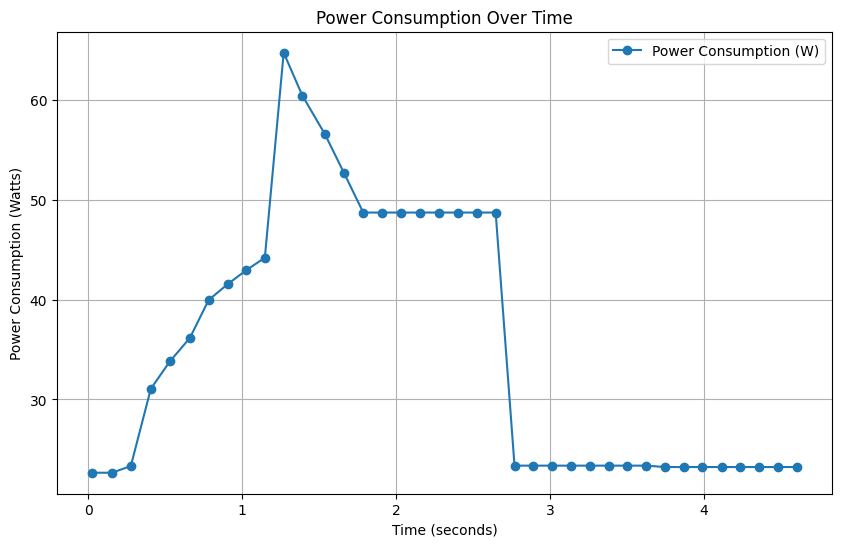

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(result["timing_data"], result["power_data"], marker='o', linestyle='-', label="Power Consumption (W)")
plt.title("Power Consumption Over Time")
plt.xlabel("Time (seconds)")
plt.ylabel("Power Consumption (Watts)")
plt.grid(True)
plt.legend()
plt.show()


# 모든 resource 다 모니터링

In [5]:
import time
import threading
from metrics.performance_metrics import calculate_power_consumption
from translate.one_trans import initialize_translation_environment, translate_text


def monitor_all_gpus(interval: float, stop_event: threading.Event, power_data: dict, timing_data: dict):
    """
    Monitors power consumption of all GPUs in real-time with timestamps.

    Parameters:
        interval (float): Time interval (in seconds) between each power reading.
        stop_event (threading.Event): Event to signal when to stop monitoring.
        power_data (dict): Dictionary to store power consumption readings for each GPU.
        timing_data (dict): Dictionary to store corresponding timestamps for each GPU.
    """
    start_time = time.time()

    # Detect all GPU devices (Assume CUDA: "cuda:0", "cuda:1", ...)
    gpu_ids = detect_all_gpus()  # Function to detect all GPUs
    while not stop_event.is_set():
        for gpu_id in gpu_ids:
            power = calculate_power_consumption(gpu_id)
            power_data[gpu_id].append(power)
            timing_data[gpu_id].append(time.time() - start_time)  # Record elapsed time
        time.sleep(interval)


def detect_all_gpus() -> list:
    """
    Detects all available GPU devices on the node.

    Returns:
        list: List of GPU IDs (e.g., ["cuda:0", "cuda:1", ...]).
    """
    import subprocess
    result = subprocess.run(
        ["nvidia-smi", "--query-gpu=index", "--format=csv,noheader"],
        stdout=subprocess.PIPE,
        stderr=subprocess.PIPE,
        text=True
    )
    gpu_ids = result.stdout.strip().split("\n")
    return [f"cuda:{gpu_id.strip()}" for gpu_id in gpu_ids]


def perform_translation_with_all_gpu_monitoring(input_text: str, ref_text: str, interval: float = 0.1):
    """
    Performs translation while monitoring power consumption of all GPUs in real-time.

    Parameters:
        input_text (str): Text to translate.
        ref_text (str): Reference text for BLEU/METEOR evaluation.
        interval (float): Time interval (in seconds) between each power reading.

    Returns:
        dict: Translation result and performance metrics.
    """
    power_data = {}
    timing_data = {}
    stop_event = threading.Event()

    # Initialize data structures for all GPUs
    gpu_ids = detect_all_gpus()
    for gpu_id in gpu_ids:
        power_data[gpu_id] = []
        timing_data[gpu_id] = []

    # Start the power monitoring thread
    monitor_thread = threading.Thread(
        target=monitor_all_gpus,
        args=(interval, stop_event, power_data, timing_data)
    )
    monitor_thread.start()

    try:
        # Perform translation
        start_time = time.time()
        translation = translate_text(input_text)
        elapsed_time = time.time() - start_time

        # Stop power monitoring
        stop_event.set()
        monitor_thread.join()

        # Calculate average power consumption for all GPUs
        avg_power_per_gpu = {
            gpu_id: sum(data) / len(data) if data else 0.0
            for gpu_id, data in power_data.items()
        }

        # Return the result and performance metrics
        return {
            "translation": translation,
            "elapsed_time": elapsed_time,
            "avg_power_per_gpu": avg_power_per_gpu,
            "power_data": power_data,
            "timing_data": timing_data
        }
    except Exception as e:
        stop_event.set()
        monitor_thread.join()
        print(f"Error during translation or monitoring: {e}")
        return None

2024-12-31 15:49:59,254 - INFO - HTTP Request: POST http://localhost:11434/api/generate "HTTP/1.1 200 OK"


Original: 이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증.
Translation: Demonstrate the value of NPU not just theoretically but based on actual metrics applicable in a service environment.
Elapsed Time: 4.955893039703369 seconds
Average Power Consumption per GPU: {'cuda:0': 35.30952380952382, 'cuda:1': 39.92095238095239, 'cuda:2': 66.01714285714286, 'cuda:3': 45.03285714285714, 'cuda:4': 45.79190476190476, 'cuda:5': 48.90095238095238}
Power Data: {'cuda:0': [22.59, 26.46, 34.46, 49.7, 64.15, 62.95, 55.58, 48.13, 48.13, 48.13, 48.13, 23.61, 23.61, 23.61, 23.61, 23.61, 23.09, 23.09, 23.09, 23.09, 22.68], 'cuda:1': [27.11, 30.22, 36.09, 49.16, 64.73, 69.61, 59.2, 55.74, 55.74, 55.74, 55.74, 28.36, 28.36, 28.36, 28.36, 28.36, 27.58, 27.58, 27.58, 27.58, 27.14], 'cuda:2': [25.31, 25.32, 33.86, 47.41, 60.86, 70.87, 72.48, 72.45, 72.48, 72.53, 72.57, 72.71, 72.77, 72.83, 72.76, 72.89, 72.79, 72.7, 72.53, 78.92, 99.32], 'cuda:3': [20.42, 20.44, 24.36, 36.66, 48.92, 55.85, 64.92, 64.99,

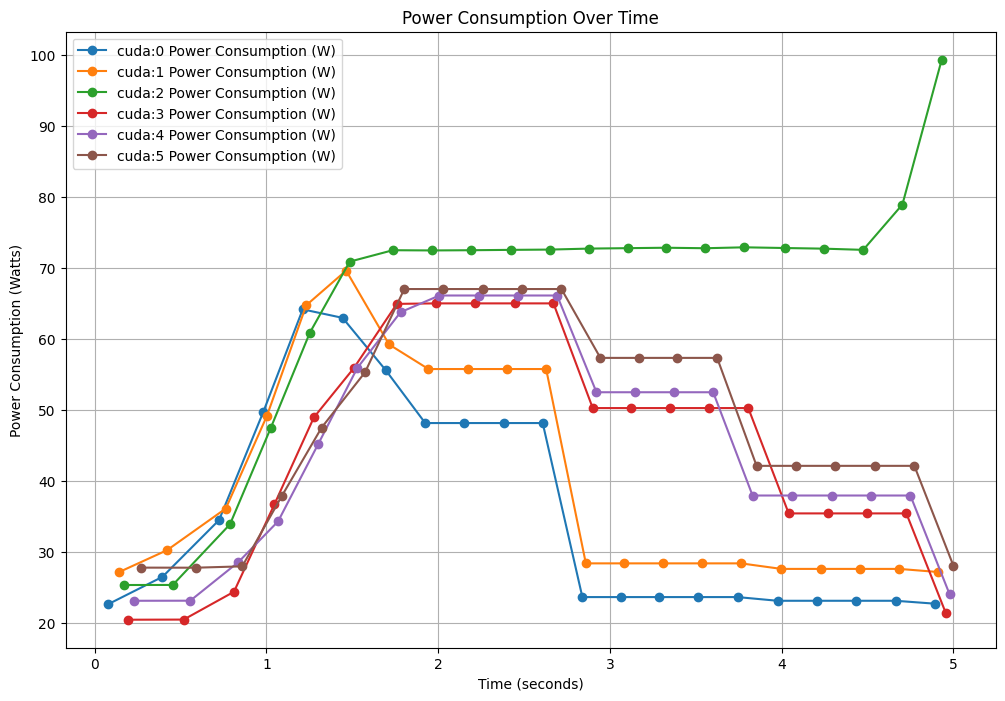

In [14]:
import matplotlib.pyplot as plt

# Example Usage
input_text = "이론적인 성능만이 아니라, 실제로 서비스 환경에서 적용 가능한 지표를 바탕으로 NPU의 가치를 입증."
ref_text = "Hello, this is a test sentence for translation."

result = perform_translation_with_all_gpu_monitoring(input_text, ref_text)

if result:
    print(f"Original: {input_text}")
    print(f"Translation: {result['translation']}")
    print(f"Elapsed Time: {result['elapsed_time']} seconds")
    print(f"Average Power Consumption per GPU: {result['avg_power_per_gpu']}")
    print(f"Power Data: {result['power_data']}")
    print(f"Timing Data: {result['timing_data']}")
    

def plot_power_consumption(timing_data: dict, power_data: dict):
    """
    Plots power consumption over time for multiple devices.

    Parameters:
        timing_data (dict): Dictionary containing timing data for each device.
        power_data (dict): Dictionary containing power consumption data for each device.
    """
    plt.figure(figsize=(12, 8))

    # Assign unique colors to each device
    colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

    # Plot data for each device
    for idx, (device, times) in enumerate(timing_data.items()):
        power = power_data[device]
        plt.plot(times, power, marker='o', linestyle='-', label=f"{device} Power Consumption (W)", color=colors[idx % len(colors)])

    plt.title("Power Consumption Over Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Power Consumption (Watts)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example Usage
if result:
    plot_power_consumption(result["timing_data"], result["power_data"])

In [4]:
import time
import threading
from metrics.performance_metrics import calculate_power_consumption
from translate.one_trans import initialize_translation_environment, translate_text
import subprocess
import re


def detect_all_devices() -> dict:
    """
    Detects all available GPU and NPU devices on the node.

    Returns:
        dict: Dictionary containing lists of GPU and NPU IDs.
              Example: {"gpus": ["cuda:0", "cuda:1"], "npus": ["npu0", "npu1"]}.
    """
    devices = {"gpus": [], "npus": []}

    # Detect GPUs using nvidia-smi
    try:
        result = subprocess.run(
            ["nvidia-smi", "--query-gpu=index", "--format=csv,noheader"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        if result.returncode == 0:
            gpu_ids = result.stdout.strip().split("\n")
            devices["gpus"] = [f"cuda:{gpu_id.strip()}" for gpu_id in gpu_ids]
    except Exception as e:
        print(f"Error detecting GPUs: {e}")

    # Detect NPUs using furiosa-smi
    try:
        result = subprocess.run(
            ["furiosa-smi", "info"],
            stdout=subprocess.PIPE,
            stderr=subprocess.PIPE,
            text=True
        )
        if result.returncode == 0:
            output = re.sub(r'\x1b\[.*?m', '', result.stdout)  # Remove ANSI escape codes
            lines = [line.strip() for line in output.split("\n")]
            for line in lines:
                if re.match(r"\| rngd \| npu\d+", line):
                    npu_id = line.split("|")[1].strip()
                    devices["npus"].append(npu_id)
    except Exception as e:
        print(f"Error detecting NPUs: {e}")

    return devices


def monitor_all_devices(interval: float, stop_event: threading.Event, power_data: dict, timing_data: dict):
    """
    Monitors power consumption of all GPUs and NPUs in real-time with timestamps.

    Parameters:
        interval (float): Time interval (in seconds) between each power reading.
        stop_event (threading.Event): Event to signal when to stop monitoring.
        power_data (dict): Dictionary to store power consumption readings for each device.
        timing_data (dict): Dictionary to store corresponding timestamps for each device.
    """
    start_time = time.time()
    devices = detect_all_devices()

    while not stop_event.is_set():
        for device_type, device_ids in devices.items():
            for device_id in device_ids:
                power = calculate_power_consumption(device_id)
                power_data.setdefault(device_id, []).append(power)
                timing_data.setdefault(device_id, []).append(time.time() - start_time)  # Record elapsed time
        time.sleep(interval)


def perform_translation_with_all_device_monitoring(input_text: str, ref_text: str, interval: float = 0.1):
    """
    Performs translation while monitoring power consumption of all devices (GPU and NPU) in real-time.

    Parameters:
        input_text (str): Text to translate.
        ref_text (str): Reference text for BLEU/METEOR evaluation.
        interval (float): Time interval (in seconds) between each power reading.

    Returns:
        dict: Translation result and performance metrics.
    """
    power_data = {}
    timing_data = {}
    stop_event = threading.Event()

    # Start the power monitoring thread
    monitor_thread = threading.Thread(
        target=monitor_all_devices,
        args=(interval, stop_event, power_data, timing_data)
    )
    monitor_thread.start()

    try:
        # Perform translation
        start_time = time.time()
        translation = translate_text(input_text)
        elapsed_time = time.time() - start_time

        # Stop power monitoring
        stop_event.set()
        monitor_thread.join()

        # Calculate average power consumption for all devices
        avg_power_per_device = {
            device_id: sum(data) / len(data) if data else 0.0
            for device_id, data in power_data.items()
        }

        # Return the result and performance metrics
        return {
            "translation": translation,
            "elapsed_time": elapsed_time,
            "avg_power_per_device": avg_power_per_device,
            "power_data": power_data,
            "timing_data": timing_data
        }
    except Exception as e:
        stop_event.set()
        monitor_thread.join()
        print(f"Error during translation or monitoring: {e}")
        return None

In [5]:
input_text = "안녕하세요, 번역 테스트입니다."
ref_text = "Hello, this is a translation test."
result = perform_translation_with_all_device_monitoring(input_text, ref_text)

print(result["translation"])
print("Average Power Consumption:", result["avg_power_per_device"])

Error detecting GPUs: [Errno 2] No such file or directory: 'nvidia-smi'
Hello, this is a translation test.
Average Power Consumption: {}


In [13]:
import pandas as pd

# Load the CSV file
file_path = '/home/elicer/Jun/llm-rag-chatbot/data/translate_rngd_flores/Translate_results_Korean_to_English.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows to check the content
data

,Source Language,Target Language,Source,Candidate,Translation Time (s)
0,Korean,English,"""그는 """"현재 4개월 된 당뇨병에서 치료된 생쥐가 있다""""고 덧붙였다.""","He added that ""there are mice that have been c...",0.9757
1,Korean,English,노바스코샤주 핼리팩스의 댈하우지대학교 의과 교수이자 캐나다 당뇨 협회 임상과학부 의...,"Dr. Ehud Ur, a professor at Dalhousie Universi...",2.5632
2,Korean,English,"다른 전문가들과 마찬가지로, 그는 당뇨병의 치료 여부에 회의적이며, 이러한 결과는 ...","Like other experts, he is skeptical about the ...",1.5493
3,Korean,English,월요일 스웨덴 한림원 노벨상 문학위원회 사무총장 사라 다니우스는 스웨덴 스베리예스 ...,"The Secretary-General of the Swedish Academy, ...",3.2167
4,Korean,English,"""대니어스(Danius)는 """"지금 우리는 아무것도 하지는 않고 있다. 그의 가장 ...","""Danius has stated that 'at the moment, we are...",2.3064
...,...,...,...,...,...
195,Korean,English,"그 사진작가는 로널드 레이건 UCLA 메디컬 센터로 이송되었으나, 이후 그곳에서 사...",The photographer was transported to the Ronald...,1.0848
196,Korean,English,"""알려진 바에 따르면 그는 20대라고 한다. 성명서에서 비버는 """"제가 비록 그 비...","According to reports, he is in his 20s. In a s...",2.8426
197,Korean,English,"연예 뉴스 웹사이트인 TMZ는 사진사가 세풀베다 대로 맞은편에 차를 세워 두고, 길...",The celebrity news website TMZ reported that t...,2.9024
198,Korean,English,경찰에 따르면 사진기자를 친 차량의 운전자는 형사 고발을 당할 가능성이 낮다.,"According to the police, the driver of the car...",1.4720
